##2024 SAGB Group Interview Project
**Sanjana Alluri and Daivik Vennela**

For this project we are going to be looking at the NFL Playbyplay 2009 to 2018 and answering the question: What factors contribute to a team’s success rate during 3rd down plays and how do different plays compare in 3rd down situations?

---


Our data includes a large variety of features having to do with individual football plays during a given game and season. These features range from team info to detailed yardage information.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score


In [ ]:
nfl = pd.read_csv('/content/nfl.csv')
nfl

<ipython-input-112-ad7e28b085be>:1: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl = pd.read_csv('/content/nfl.csv')


,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449366,4059,2018121700,CAR,NO,CAR,home,NO,CAR,66.0,2018-12-17,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
449367,4081,2018121700,CAR,NO,CAR,home,NO,CAR,66.0,2018-12-17,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
449368,4106,2018121700,CAR,NO,CAR,home,NO,CAR,61.0,2018-12-17,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
449369,4128,2018121700,CAR,NO,NO,away,CAR,CAR,39.0,2018-12-17,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


# Cleaning the Data

---

Since our research statement only considers 3rd down plays, we filter the dataframe to only include those rows.

In [ ]:
# Selecting 3rd down plays
nfl = nfl[nfl['down'] == 3]
nfl

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
7,207,2009091000,PIT,TEN,TEN,away,PIT,TEN,94.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
13,346,2009091000,PIT,TEN,PIT,home,TEN,TEN,22.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
19,496,2009091000,PIT,TEN,TEN,away,PIT,PIT,19.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
23,584,2009091000,PIT,TEN,PIT,home,TEN,PIT,70.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449345,3548,2018121700,CAR,NO,NO,away,CAR,NO,69.0,2018-12-17,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
449353,3745,2018121700,CAR,NO,NO,away,CAR,CAR,23.0,2018-12-17,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
449361,3904,2018121700,CAR,NO,NO,away,CAR,CAR,5.0,2018-12-17,...,NaN,NaN,NaN,1,upheld,NaN,0.0,0.0,0.0,0.0
449364,4002,2018121700,CAR,NO,CAR,home,NO,CAR,71.0,2018-12-17,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


In [ ]:
nfl.columns.to_list()
nfl.columns.size

255

The dataframe is very daunting at first glance, so we made a couple visualizations to understand the dataset better aside from studying the numbers. These visualizations help us understand how different plays compare in 3rd down situations.

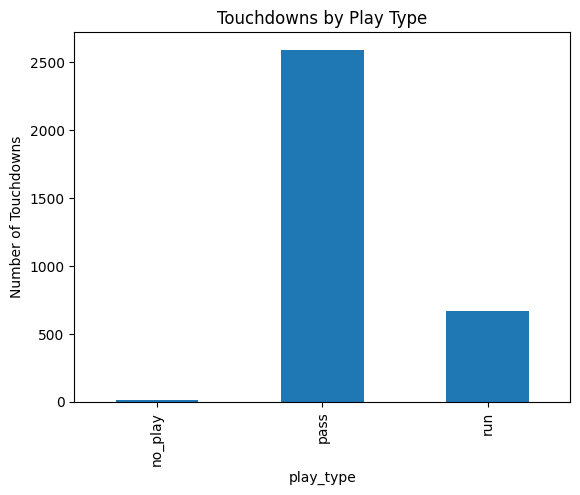

In [ ]:
touchdowns = nfl[nfl['touchdown'] == 1]
touchdown_counts = touchdowns.groupby('play_type')['touchdown'].count()

touchdown_counts.plot(kind='bar')
plt.ylabel('Number of Touchdowns')
plt.title('Touchdowns by Play Type')
plt.show()

play_type
pass    5.80122
run     4.58449
Name: yards_gained, dtype: float64


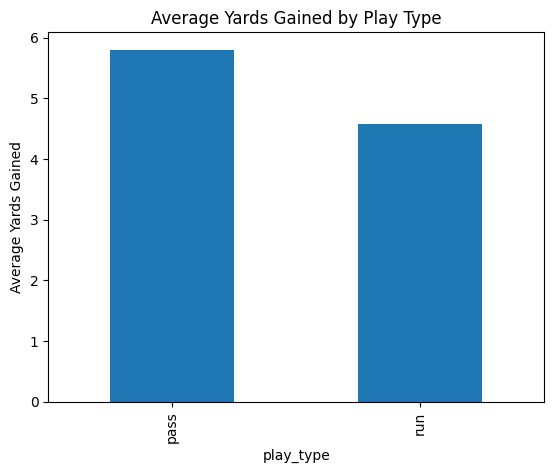

In [ ]:
average_yards = nfl[nfl['play_type'].isin(['run', 'pass'])].groupby('play_type')['yards_gained'].mean()

print(average_yards)
average_yards.plot(kind='bar')
plt.ylabel('Average Yards Gained')
plt.title('Average Yards Gained by Play Type')
plt.show()

When studying this dataframe, we noticed a few columns with null values that would not contribute to our analysis. In addition to this, we needed to determine which features out of the 252 available were worth looking at, so that became our first course of action.

First of all, we defined a successful 3rd down play as one that is **true** for `third_down_converted`, and **false** for `third_down_failed`. This is boolean data that says if the team on the current play was able to reach the first down line or not (more details below).

In [ ]:
nfl.pivot_table(
    index='third_down_converted',
    columns='third_down_failed',
    values='play_id',
    aggfunc=np.size
)

third_down_failed,0.0,1.0
third_down_converted,,
0.0,6330,41351
1.0,26137,3


Theoretically `third_down_converted` and `third_down_failed` should be mutually exclusive, but due to inconclusive plays (could be caused by technicalities like penalties or timeouts) and simple data entry errors, we see them as inclusive for a minority of plays. Due to these issues, we will only consider the diagonal of plays that are exclusive in this sense.

In [ ]:
cleaned_nfl = nfl[~((nfl['third_down_converted'] == 1) & (nfl['third_down_failed'] == 1)) &
                  ~((nfl['third_down_converted'] == 0) & (nfl['third_down_failed'] == 0))]
cleaned_nfl

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
7,207,2009091000,PIT,TEN,TEN,away,PIT,TEN,94.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
13,346,2009091000,PIT,TEN,PIT,home,TEN,TEN,22.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
19,496,2009091000,PIT,TEN,TEN,away,PIT,PIT,19.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
23,584,2009091000,PIT,TEN,PIT,home,TEN,PIT,70.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449345,3548,2018121700,CAR,NO,NO,away,CAR,NO,69.0,2018-12-17,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
449353,3745,2018121700,CAR,NO,NO,away,CAR,CAR,23.0,2018-12-17,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
449361,3904,2018121700,CAR,NO,NO,away,CAR,CAR,5.0,2018-12-17,...,NaN,NaN,NaN,1,upheld,NaN,0.0,0.0,0.0,0.0
449364,4002,2018121700,CAR,NO,CAR,home,NO,CAR,71.0,2018-12-17,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


##Determine Relevant Features
---

After isolating the data that is relavent to our main question, we look into narrowing down our dataset so that we are only considering the most relevant features to a 3rd down performance. We do this by studying features manually and coming up with a tenative list that may be important:


*   `third_down_converted`; an obvious choice
*   `ydstogo` - number of yards left
*   `play_type` - pass or run
*   `ydsnet` - net yards gained on the current play
*   `game_seconds_remaining` - the time left in the game, in seconds
*   `score_differential` - difference in score between current and opposing team
*   `wp` - the win probablity of the current team
*   `wpa` - the difference in the current team's `wp` before and after the current play
*   `no_score_prob` -
*   `yards_after_catch` - number of yards gained after a catch







In [ ]:
productive_plays = cleaned_nfl[cleaned_nfl['third_down_converted'] == True]
productive_plays['yards_after_catch']

,yards_after_catch
29,3.0
44,3.0
55,4.0
61,3.0
107,1.0
...,...
449314,3.0
449317,NaN
449336,15.0
449345,0.0


In the context of the project you cannot isolate singular factors as the most "important", in reality it is a combination of factors that contribute to the a succesful play. For the purpose of this project, we are going pick out the numerical features above and evaulate their importance.

In [ ]:
cleaned_nfl.rename(columns={
    'ydstogo': 'yards_to_go',
    'ydsnet': 'net_yards_gained',
    'game_seconds_remaining': 'remaining_game_time',
    'score_differential': 'score_differential',
    'wp': 'win_probability',
    'wpa': 'win_probability_change',
    'no_score_prob': 'probability_of_scoring',
    'yards_after_catch': 'yards_after_catch'
}, inplace=True)

# remove rows with NaN values
cleaned_nfl = cleaned_nfl.dropna(subset=[
    'yards_to_go',
    'net_yards_gained',
    'remaining_game_time',
    'score_differential',
    'win_probability',
    'win_probability_change',
    'probability_of_scoring',
    'yards_after_catch',
    'third_down_converted'
])

features = ['yards_to_go',
            'net_yards_gained',
            'remaining_game_time',
            'score_differential',
            'win_probability',
            'win_probability_change',
            'probability_of_scoring',
            'yards_after_catch']

X = cleaned_nfl[features]
y = cleaned_nfl['third_down_converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-120-53052eb28036>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_nfl.rename(columns={


Before we move on, we make sure that none of these features have NaN values, which will not work with this model.

In [ ]:
# find rows in X_train where any column value is NaN
null_rows = X_train[X_train.isna().any(axis=1)]
null_rows

,yards_to_go,net_yards_gained,remaining_game_time,score_differential,win_probability,win_probability_change,probability_of_scoring,yards_after_catch


Some extra information: Before we tried not dropping the rows above, it seemed like `yards_after_catch` has all the existing NaN values, so there was something weird going on.

The `net_yards_gained` was very high in comparison to `yards_to_go`, so we  initially thought these rows were plays where all the yardage was made when the ball was in the air (player was tackled as soon as they caught it). But this senario already exists in the data when `yards_after_catch` is 0.

Looking at `air_yards` for these cases, we learned they were not consistent with `net_yards_gained`. We had an option to clean this data by either replacing `yards_after_catch` with zeros, or removing the rows entirely. However, we ran into the issue of columns being altered when we split them for the model, and we also noticed there were many rows of invalid data that could alter the result. So, we decided to remove those rows to prevent any further confusion (we also had enough data after the fact to work with).

0.9862155388471178


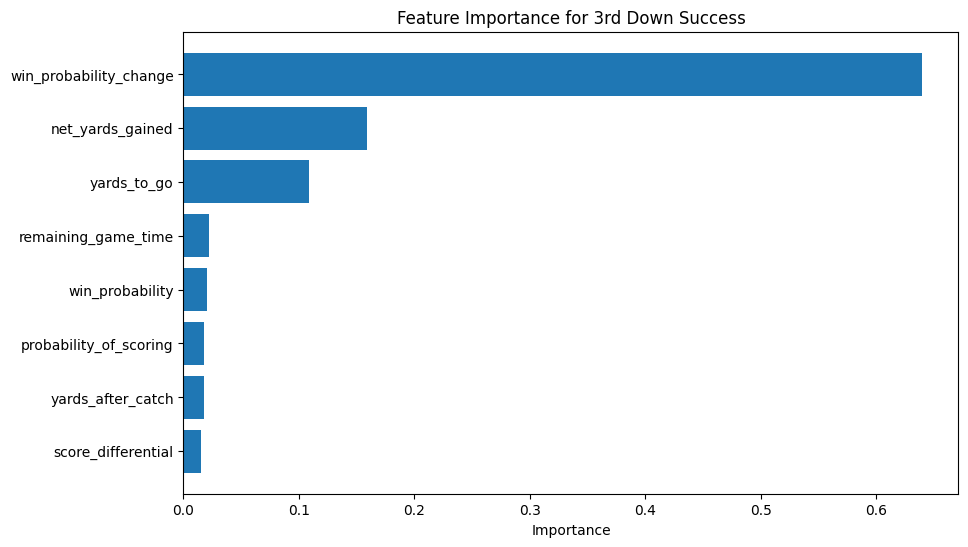

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

importances = model.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance for 3rd Down Success')
plt.gca().invert_yaxis()
plt.show()

The feature importance scores obtained from the model help us identify which factors are most influential in 3rd down successes.

## Conclusions

This graph puts `win_probability_change`, `net_yards_gained`, and `yards_to_go` at the top in terms of most influential features for 3rd down plays. This makes sense; the change in WPC is almost synonymous with a successful 3rd down play. We found `yards_to_go` and `remaining_game_time` especially interesting, and made a few visualizations to understand their influence better.

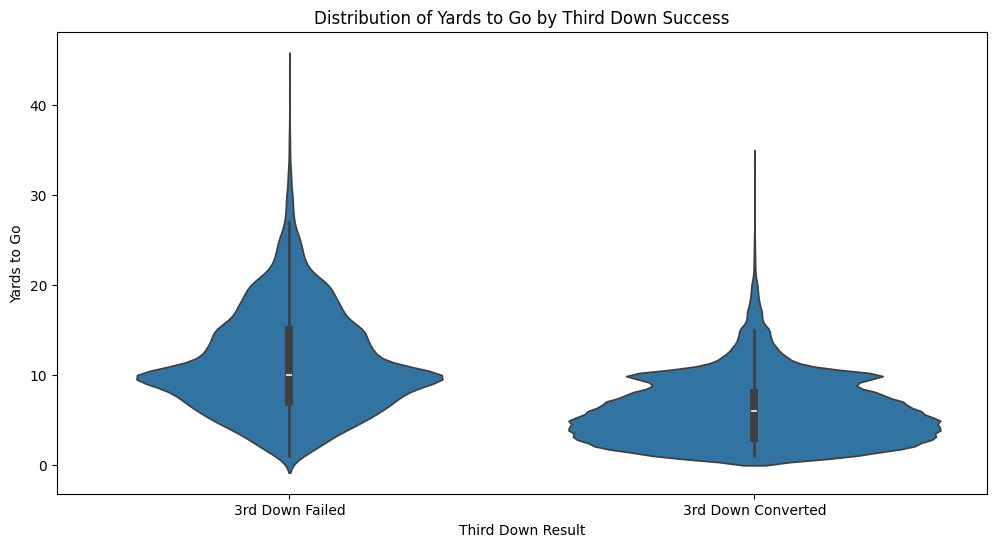

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='third_down_converted', y='yards_to_go', data=cleaned_nfl)
plt.title('Distribution of Yards to Go by Third Down Success')
plt.xlabel('Third Down Result')
plt.ylabel('Yards to Go')
plt.xticks([0, 1], ['3rd Down Failed', '3rd Down Converted'])
plt.show()

The violin plot above shows how most converted plays happen at a sweet spot of about 5 yards to go, and you also see a clear spike at the 10 yard mark, which is the max yards you have left to get to the first down. This suggests that 3rd down plays that aim to hit the line rather than surpass it tend to fare better.

<ipython-input-125-e57a095036a7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_nfl['time_bin'] = pd.cut(cleaned_nfl['remaining_game_time'], bins=bins, right=False)
<ipython-input-125-e57a095036a7>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cleaned_nfl.groupby('time_bin')['third_down_converted']


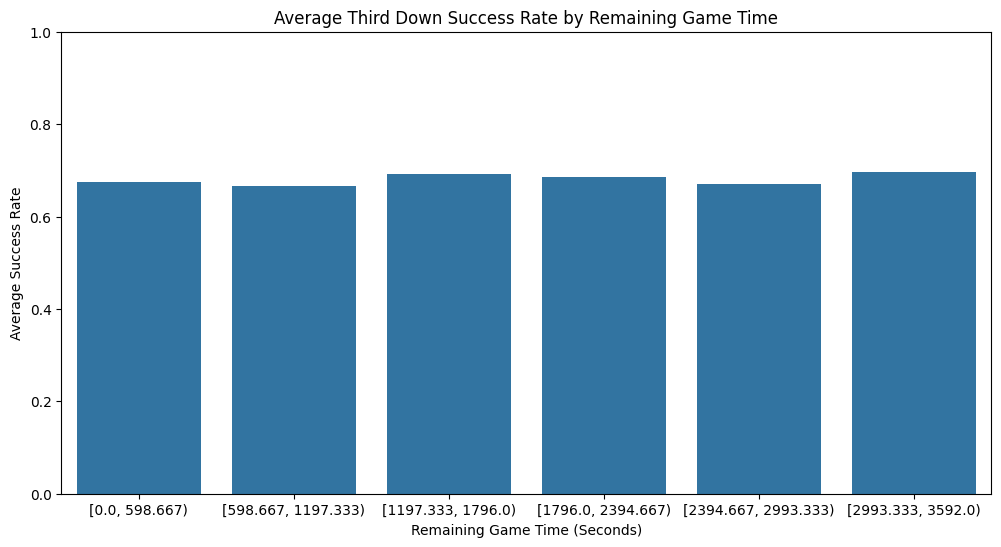

In [ ]:
def create_bins(df, column, num_bins):
    max_value = df[column].max()
    bins = np.linspace(0, max_value, num_bins + 1)
    return bins

bins = create_bins(cleaned_nfl, 'remaining_game_time', 6)
cleaned_nfl['time_bin'] = pd.cut(cleaned_nfl['remaining_game_time'], bins=bins, right=False)

success_rate_time = (
    cleaned_nfl.groupby('time_bin')['third_down_converted']
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(x='time_bin', y='third_down_converted', data=success_rate_time)
plt.title('Average Third Down Success Rate by Remaining Game Time')
plt.xlabel('Remaining Game Time (Seconds)')
plt.ylabel('Average Success Rate')
plt.ylim(0, 1)
plt.show()

The bar chart above shows how success rate is very similar across all timing situations from mere seconds to near an hour of play left. We weren't expecting very conclusive data since `remaining_game_time` is very low in importance on the model, but we can at least assume that at the level of the NFL, time left in the game does not greatly affect the performance of the players during 3rd down plays, they are real professionals!

##Ending Thoughts

Another way that could help predict whether a play would be  would be creating a sample template that accounts for a variety of factors both numerical and categorical. You can use this combination and compare it to other plays to classify whether a new play fall under the category of a "successful" play.  

If we went with this approach we could use numerical values to represent string categorical values which would allow us to take more factors into consideration.